<a href="https://colab.research.google.com/github/manglaaseem28/Email-Spam-Detector/blob/master/Spam_Detection_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link:
https://github.com/Shreyakkk/Email-Spam-Detector/blob/master/spam.csv

(raw link:- https://raw.githubusercontent.com/Shreyakkk/Email-Spam-Detector/master/spam.csv)
1.	Based on the dataset above, perform binary classification problem for email spam detection using Support Vector Machine (SVM) based machine Learning classification model.
2.	Check how performance varies with different types of Kernels
3.	Also check if the decision boundary changes with change in kernels.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyakkk/Email-Spam-Detector/master/spam.csv')
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.isna().sum()

Label        0
EmailText    0
dtype: int64

In [ ]:
# splitting features and target
x = df.iloc[:, 1]
y = df.iloc[:, 0]

In [ ]:
# importing PCA for reducing features for plotting 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
# importing LabelEncoder for encoding target
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [ ]:
# x_pca = pca.fit_transform(vectorizer.fit_transform(x).toarray())
# plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labelEncoder.fit_transform(y))
# plt.show()

In [ ]:
# splitting data in train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=123)

In [ ]:
# importing CountVectorizer for encoding featues into categorical data
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(analyzer = 'word', tokenizer = None, preprocessor = None, stop_words = None)

In [ ]:
# encoding features
train_data_features = vectorizer.fit_transform(x_train)
train_data_features = train_data_features.toarray()

test_data_features = vectorizer.transform(x_test)
test_data_features = test_data_features.toarray()

In [ ]:
# reducing features for plotting
features_pca = pca.fit_transform(vectorizer.fit_transform(x).toarray())

# encoding target data
target_encoded = labelEncoder.fit_transform(y)

In [ ]:
train_pca = pca.fit_transform(train_data_features)
test_pca = pca.fit_transform(test_data_features)

In [ ]:
# print(test_data_features)

In [ ]:
# importing libraries for model
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# SVM with Linear Kernel

clf = svm.SVC(kernel = 'linear', C=1.0)
print('Training')
clf.fit(train_data_features, y_train)

print('Testing')
predict = clf.predict(test_data_features)
accuracy = np.mean(predict == y_test)
print('Accuracy using Linear Kernel: ', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

Training
Testing
Accuracy using Linear Kernel:  0.9833153928955867
Confusion Matrix:
 [[1620    0]
 [  31  207]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1620
        spam       1.00      0.87      0.93       238

    accuracy                           0.98      1858
   macro avg       0.99      0.93      0.96      1858
weighted avg       0.98      0.98      0.98      1858



In [ ]:
# Testing Results by putting Custom Values
# clf.predict(vectorizer.transform(['Free']).toarray())

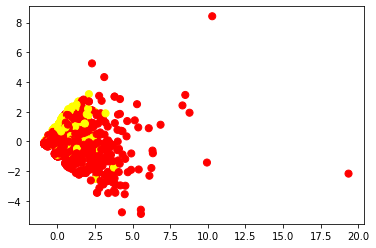

In [ ]:
 plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target_encoded, s=50, cmap='autumn')

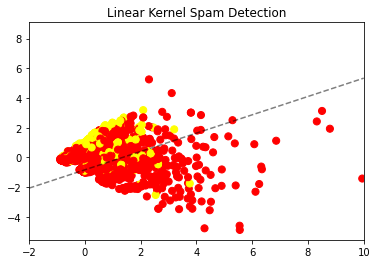

In [ ]:
b= plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target_encoded, s=50, cmap='autumn')
plt.xlim(-2, 10)
plt.title('Linear Kernel Spam Detection')

# plot the decision function
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(train_pca, y_train)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
          #  linewidth=1, facecolors='none', edgecolors='k')


In [ ]:
# SVM with Polynomial Kernel

clf = svm.SVC(kernel = 'poly', degree=2, coef0=0.5)
print('Training')
clf.fit(train_data_features, y_train)

print('Testing')
predict = clf.predict(test_data_features)
accuracy = np.mean(predict == y_test)
print('Accuracy using Polynomial Kernel: ', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

Training
Testing
Accuracy using Polynomial Kernel:  0.9811625403659849
Confusion Matrix:
 [[1620    0]
 [  35  203]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1620
        spam       1.00      0.85      0.92       238

    accuracy                           0.98      1858
   macro avg       0.99      0.93      0.95      1858
weighted avg       0.98      0.98      0.98      1858



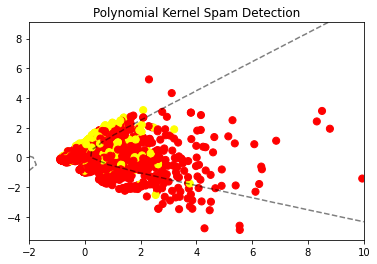

In [ ]:
b= plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target_encoded, s=50, cmap='autumn')
plt.xlim(-2, 10)
plt.title('Polynomial Kernel Spam Detection')

# plot the decision function
clf = svm.SVC(kernel = 'poly', degree=2, coef0=0.5)
clf.fit(train_pca, y_train)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
          #  linewidth=1, facecolors='none', edgecolors='k')


In [ ]:
# SVM with Radial Kernel

clf = svm.SVC(kernel = 'rbf', gamma=0.1)
print('Training')
clf.fit(train_data_features, y_train)

print('Testing')
predict = clf.predict(test_data_features)
accuracy = np.mean(predict == y_test)
print('Accuracy Using Radial Kernel: ', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

Training
Testing
Accuracy Using Radial Kernel:  0.9693218514531755
Confusion Matrix:
 [[1620    0]
 [  57  181]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1620
        spam       1.00      0.76      0.86       238

    accuracy                           0.97      1858
   macro avg       0.98      0.88      0.92      1858
weighted avg       0.97      0.97      0.97      1858



In [ ]:
# y_test
clf.score(test_data_features, y_test)

0.9693218514531755

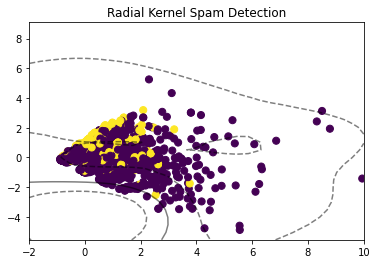

In [ ]:
b= plt.scatter(features_pca[:, 0], features_pca[:, 1], c=target_encoded, s=50)
plt.xlim(-2, 10)
plt.title('Radial Kernel Spam Detection')

# plot the decision function
clf = svm.SVC(kernel = 'rbf', gamma=0.1)
clf.fit(train_pca, y_train)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
          #  linewidth=1, facecolors='none', edgecolors='k')
